In [2]:
import pandas as pd

# Load the dataset (assuming it's saved as 'candy_data.csv')
df = pd.read_csv('candy-data.csv')

# Display the first few rows to understand the data structure
print(df.head())


  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465  


In [3]:
# Check for missing values
print(df.isnull().sum())

# Example: Fill missing values with the mean of the column (if needed)
df.fillna(df.mean(), inplace=True)

# If you have categorical columns, you can encode them
# Example: Convert any categorical columns to numeric values if needed
df['chocolate'] = df['chocolate'].astype(int)  # Example for binary encoding


competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


TypeError: Could not convert ["100 Grand3 MusketeersOne dimeOne quarterAir HeadsAlmond JoyBaby RuthBoston Baked BeansCandy CornCaramel Apple PopsCharleston ChewChewey Lemonhead Fruit MixChicletsDotsDum DumsFruit ChewsFun DipGobstopperHaribo Gold BearsHaribo Happy ColaHaribo Sour BearsHaribo Twin SnakesHershey's KissesHershey's KrackelHershey's Milk ChocolateHershey's Special DarkJawbustersJunior MintsKit KatLaffy TaffyLemonheadLifesavers big ring gummiesPeanut butter M&M'sM&M'sMike & IkeMilk DudsMilky WayMilky Way MidnightMilky Way Simply CaramelMoundsMr Good BarNerdsNestle ButterfingerNestle CrunchNik L NipNow & LaterPaydayPeanut M&MsPixie SticksPop RocksRed vinesReese's MiniaturesReese's Peanut Butter cupReese's piecesReese's stuffed with piecesRing popRoloRoot Beer BarrelsRuntsSixletsSkittles originalSkittles wildberryNestle SmartiesSmarties candySnickersSnickers CrisperSour Patch KidsSour Patch TrickstersStarburstStrawberry bon bonsSugar BabiesSugar DaddySuper BubbleSwedish FishTootsie PopTootsie Roll JuniorsTootsie Roll MidgiesTootsie Roll Snack BarsTrolli Sour BitesTwixTwizzlersWarheadsWelch's Fruit SnacksWerther's Original CaramelWhoppers"] to numeric

In [4]:
# Selecting features (independent variables)
X = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']]

# Selecting target variable (dependent variable)
y = df['winpercent']

# Check the first few rows of X and y
print(X.head())
print(y.head())


   chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  \
0          1       0        1               0       0                 1     0   
1          1       0        0               0       1                 0     0   
2          0       0        0               0       0                 0     0   
3          0       0        0               0       0                 0     0   
4          0       1        0               0       0                 0     0   

   bar  pluribus  sugarpercent  pricepercent  
0    1         0         0.732         0.860  
1    1         0         0.604         0.511  
2    0         0         0.011         0.116  
3    0         0         0.011         0.511  
4    0         0         0.906         0.511  
0    66.971725
1    67.602936
2    32.261086
3    46.116505
4    52.341465
Name: winpercent, dtype: float64


In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(68, 11) (17, 11) (68,) (17,)


In [6]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display the coefficients
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Model Coefficients: [18.86638998  8.31168249 -0.0404909   8.73805688  4.49475553  8.75868751
 -5.05673334  0.08776222 -3.94022075  9.94857885 -4.24289722]
Model Intercept: 35.70229227432463


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 160.98295238531898
R-squared: 0.19699888334669768


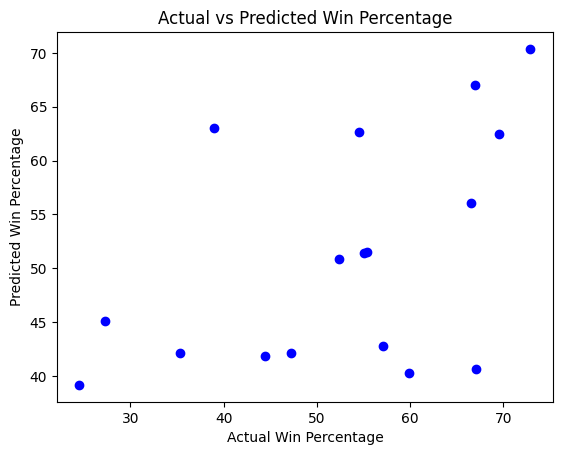

In [8]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('Actual vs Predicted Win Percentage')
plt.show()


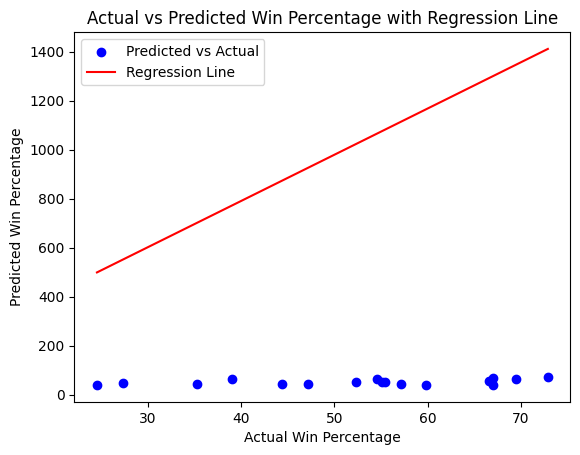

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot the regression line (y = mx + b)
# Create an array for plotting the line (x values)
line_x = np.linspace(min(y_test), max(y_test), 100)

# Calculate the predicted values using the linear regression equation: y = mx + b
line_y = model.intercept_ + model.coef_[0] * line_x  # Equation of the line

# Plot the linear regression line
plt.plot(line_x, line_y, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('Actual vs Predicted Win Percentage with Regression Line')

# Show the legend
plt.legend()

# Show the plot
plt.show()
